In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\archive\student-por.csv")
data.head(10)  # Shows the first 10 rows


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [5]:
#how many non-null values each column contains.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
#Statistical insights for numerical columns only
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
#Spot the Missing Values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
#Get Column Names as a Python List
data.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

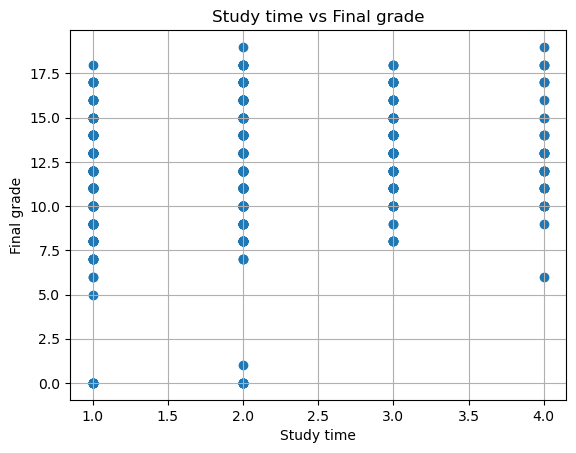

In [22]:
plt.scatter(data['studytime'],data['G3'])
plt.xlabel("Study time")
plt.ylabel("Final grade")
plt.title("Study time vs Final grade")
plt.grid(True)
plt.show()


In [55]:
X=data[['studytime']].values   #this makes it a NumPy array
y=data[['G3']]
X_train, X_test, y_train, y_test=train_test_split (X,y, test_size=0.2, random_state=42)

In [56]:
rg=LinearRegression()
rg.fit(X_train,y_train)

LinearRegression()

In [57]:
print("Slope (Coefficient):", rg.coef_[0])  #tells you how strong and useful your features is.
print("Intercept:", rg.intercept_)

#Predict & Evaluate
y_pred=rg.predict(X_test)

print("MSE (Linear):", mean_squared_error(y_test, y_pred)) #smaller MSE=better
print("MAE :", mean_absolute_error(y_test,y_pred))  #smaller MAE=better
print("R2:", r2_score(y_test,y_pred))


Slope (Coefficient): [0.99268136]
Intercept: [9.9060183]
MSE (Linear): 9.38487192267022
MAE : 2.322281480942153
R2: 0.037618410395823476


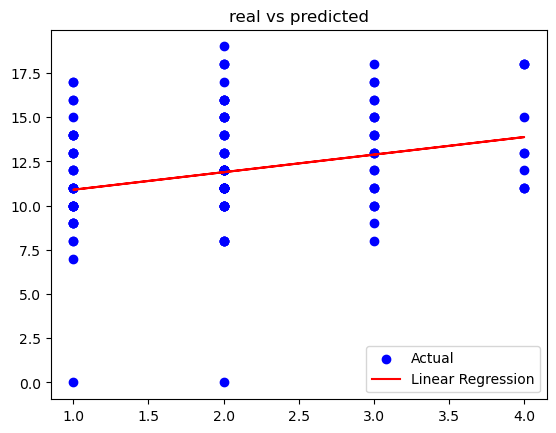

In [58]:
# Visualize predictions
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.legend()
plt.title('real vs predicted')
plt.show()

In [59]:
#Bonus
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X) #this adds study_time^2

In [61]:
X_train_poly, X_test_poly, y_train, y_test=train_test_split(X_poly,y, test_size=0.2,random_state=42)

In [62]:
#train a new model
rg_poly=LinearRegression()
rg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [63]:
#make predictions and evaluate

y_pred_poly = rg_poly.predict(X_test_poly)

print("MSE (Poly):", mean_squared_error(y_test, y_pred_poly))
print("MAE (Poly):", mean_absolute_error(y_test, y_pred_poly))
print("R² (Poly):", r2_score(y_test, y_pred_poly))


MSE (Poly): 9.461550659720247
MAE (Poly): 2.327709752475675
R² (Poly): 0.029755308431396177


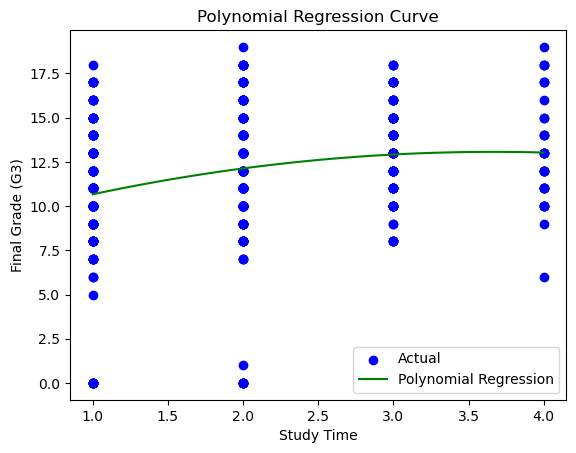

In [64]:
# Sort values for a smooth curve
x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_plot_poly = poly.transform(x_plot)
y_plot = rg_poly.predict(x_plot_poly)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(x_plot, y_plot, color='green', label='Polynomial Regression')
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.title("Polynomial Regression Curve")
plt.legend()
plt.show()